## 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [32]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [33]:
X_st = X.copy().astype(np.float64)

for i in range(1, X.shape[0]):
    X_st[i] = calc_std_feat(X[i])

In [34]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W
#     return err

In [35]:
# ww = eval_model_reg2(X_st, y, iterations=10000, alpha=1e-2, lambda_=1e-4)
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [36]:
lambdas = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

In [41]:
W_list = []
for lmbd in lambdas:
    W_list.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmbd))

<function matplotlib.pyplot.show(*args, **kw)>

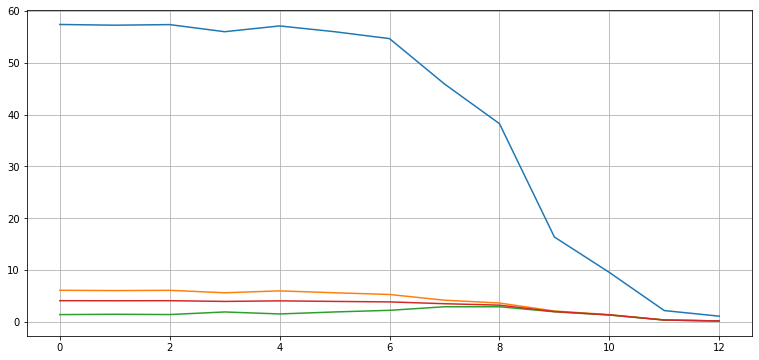

In [44]:
plt.figure(figsize=(13, 6))
plt.plot(W_list)
plt.grid() 

plt.show

## 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Если применять сразу и нормализацию, и стандартизацию - признак будет или нормализован, или стандартизирован (в зависимости от того, какая опперация будет применена последней).

Поэтому это в этом нет смысла...


## 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [45]:
# меняем lambda_ * W
# на lambda_ / 2 * np.abs(W)
# формуа из урока
# раньше двойка в делителе сокращалась, теперь она остается


def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ / 2 * np.abs(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [46]:
ww1 = eval_model_reg1(X_st, y, iterations=10000, alpha=1e-2, lambda_=1e-4)
ww1

1000 [57.39856494  5.76619518  1.85655681  4.03903935] 39.80717480876073
2000 [57.39856504  6.07205218  1.50098264  4.09316168] 39.7785041881077
3000 [57.39856504  6.11413996  1.44105906  4.1117804 ] 39.77777053979602
4000 [57.39856504  6.12058537  1.43110249  4.11542399] 39.77774911735285
5000 [57.39856504  6.12161881  1.4294564   4.11605868] 39.7777482605788
6000 [57.39856504  6.12178746  1.42918473  4.11616533] 39.777748192000914
7000 [57.39856504  6.12181517  1.42913993  4.11618303] 39.77774818267401
8000 [57.39856504  6.12181973  1.42913254  4.11618596] 39.77774818119032
9000 [57.39856504  6.12182048  1.42913132  4.11618644] 39.77774818094715
10000 [57.39856504  6.12182061  1.42913112  4.11618652] 39.777748180907125


array([57.39856504,  6.12182061,  1.42913112,  4.11618652])